# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold

# Functions

In [ ]:
def find_upper_outliers(dataframe, column_name):
    c_name = dataframe[column_name]
    mean = np.mean(c_name)
    std = np.std(c_name)
    outliers = [i for i in c_name if i > mean + (3 * std)]
    outliers.sort()
    print("How many outliers are there: " + str(len(outliers)))
    print(outliers[:10])
    return outliers

def find_lower_outliers(dataframe, column_name):
    c_name = dataframe[column_name]
    mean = np.mean(c_name)
    std = np.std(c_name)
    outliers = [i for i in c_name if i < mean - (3 * std)]
    outliers.sort()
    print("How many outliers are there: " + str(len(outliers)))
    print(outliers[-10:])
    return outliers
def variance_threshold_selector(data, thresh=0.0):
    selector = VarianceThreshold(threshold=thresh)
    selector.fit(data)
    return [column for column in data.columns if not selector.get_support()[data.columns.get_loc(column)]]  

# Data Cleansing and Data Transformation

## First Data Frame

In [ ]:
# First Dataframe is bank_a_df
bank_a_df = pd.read_csv('/content/bank-additional.csv', sep=';')

In [ ]:
bank_a_df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3465,39,services,married,high.school,no,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
1313,52,blue-collar,married,high.school,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
2046,43,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2175,47,technician,divorced,professional.course,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2072,41,technician,married,professional.course,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [ ]:
bank_a_df.shape

(4119, 21)

In [ ]:
print(f'Any NaN values? {bank_a_df.isna().values.any()}')
print(f'Any duplicates? {bank_a_df.duplicated().values.any()}')

Any NaN values? False
Any duplicates? False


There are no Nan values or duplicates in the bank dataframe. Let's check for outliers.

In [ ]:
bank_a_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank_a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


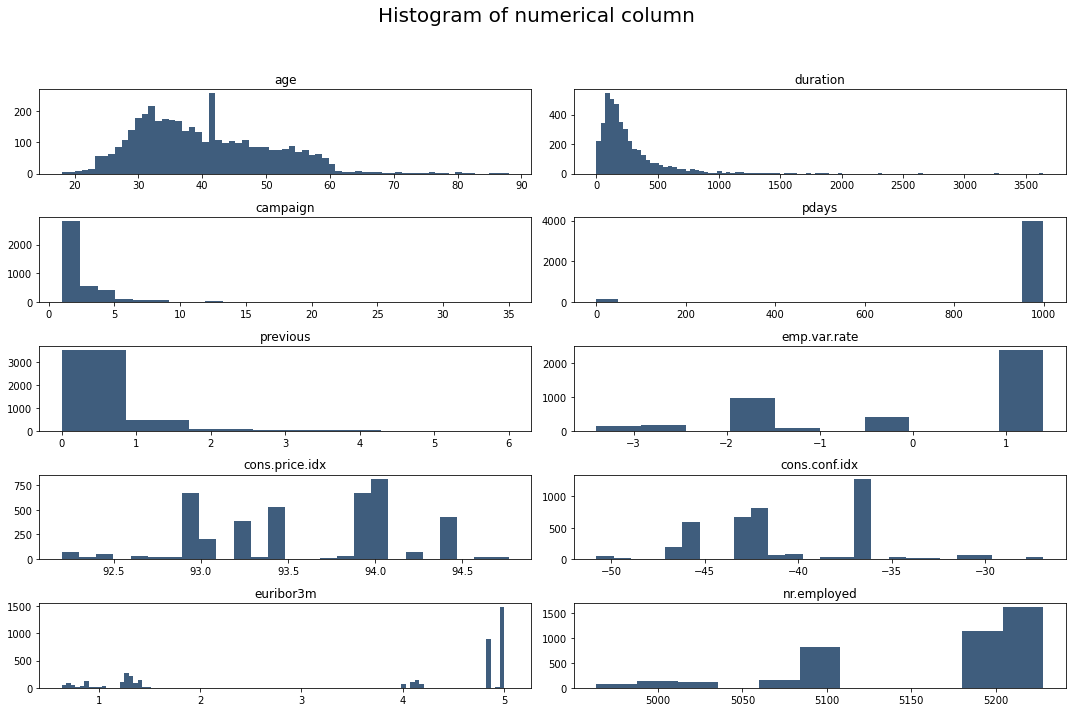

In [ ]:
dataset1 = bank_a_df.drop(columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y'])

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    vals = np.size(dataset1.iloc[:,i].unique())
    if vals>=100:
        vals=100
    
    plt.hist(dataset1.iloc[:,i], bins= vals, color="#3F5D7D")
    
plt.tight_layout(rect=[0,0.03,1,0.95])

Let's check lower outliers

In [ ]:
for col_name in numerical_cols:
  print(col_name)
  outliers = find_lower_outliers(bank_a_df, col_name)

age
How many outliers are there: 0
[]
duration
How many outliers are there: 0
[]
campaign
How many outliers are there: 0
[]
pdays
How many outliers are there: 160
[14, 15, 15, 16, 16, 17, 18, 18, 19, 21]
previous
How many outliers are there: 0
[]
emp.var.rate
How many outliers are there: 0
[]
cons.price.idx
How many outliers are there: 0
[]
cons.conf.idx
How many outliers are there: 0
[]
euribor3m
How many outliers are there: 0
[]
nr.employed
How many outliers are there: 0
[]


In [ ]:
outliers_pdays = find_lower_outliers(bank_a_df, 'pdays')

How many outliers are there: 160
[14, 15, 15, 16, 16, 17, 18, 18, 19, 21]


In [ ]:
outliers_pdays[:10]

[0, 0, 1, 1, 1, 2, 2, 2, 2, 3]

Only the PDAYS column has lower outliers. Let's check upper outliers

In [ ]:
for col_name in numerical_cols:
  print(col_name)
  outliers = find_upper_outliers(bank_a_df, col_name)

age
How many outliers are there: 32
[72, 72, 73, 73, 73, 74, 74, 74, 75, 75]
duration
How many outliers are there: 87
[1045, 1046, 1058, 1062, 1065, 1067, 1068, 1074, 1076, 1087]
campaign
How many outliers are there: 87
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
pdays
How many outliers are there: 0
[]
previous
How many outliers are there: 121
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
emp.var.rate
How many outliers are there: 0
[]
cons.price.idx
How many outliers are there: 0
[]
cons.conf.idx
How many outliers are there: 0
[]
euribor3m
How many outliers are there: 0
[]
nr.employed
How many outliers are there: 0
[]


Age, duration, campaign and previous columns have upper outliers.

In [ ]:
temp_df=bank_a_df[bank_a_df['pdays'] < 999]
temp_df.shape

(160, 21)

In [ ]:
find_lower_outliers(temp_df, 'pdays')

How many outliers are there: 0
[]


[]

## Handling Outliers

In [ ]:
 # campaign: drop outliers
# previous: drop outliers
# for age and duration columns apply logorithmic transformation

In [ ]:
# dropping outliers from pdays column
# bank_a_df = bank_a_df[bank_a_df['pdays'] > 21]
# bank_a_df.shape

(3959, 21)

In [ ]:
# dropping outliers from campaign column
bank_a_df = bank_a_df[bank_a_df['campaign'] < 11]
bank_a_df.shape

(3872, 21)

In [ ]:
# dropping outliers from previous column
bank_a_df = bank_a_df[bank_a_df['previous'] < 2]
bank_a_df.shape

(3820, 21)

In [ ]:
bank_a_df = bank_a_df[bank_a_df['duration'] > 0]

In [ ]:
bank_a_df.shape

(3819, 21)

In [ ]:
# Logarithmic Transformation for age and duration columns
bank_a_df['log_age'] = np.log(bank_a_df['age'])
bank_a_df['log_duration'] = np.log(bank_a_df['duration'])

In [ ]:
bank_a_df.drop(columns=['age', 'duration'], inplace=True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Feature Selection

In [ ]:
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
dataset = bank_a_df.drop(columns=['log_age', 'log_duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed'])

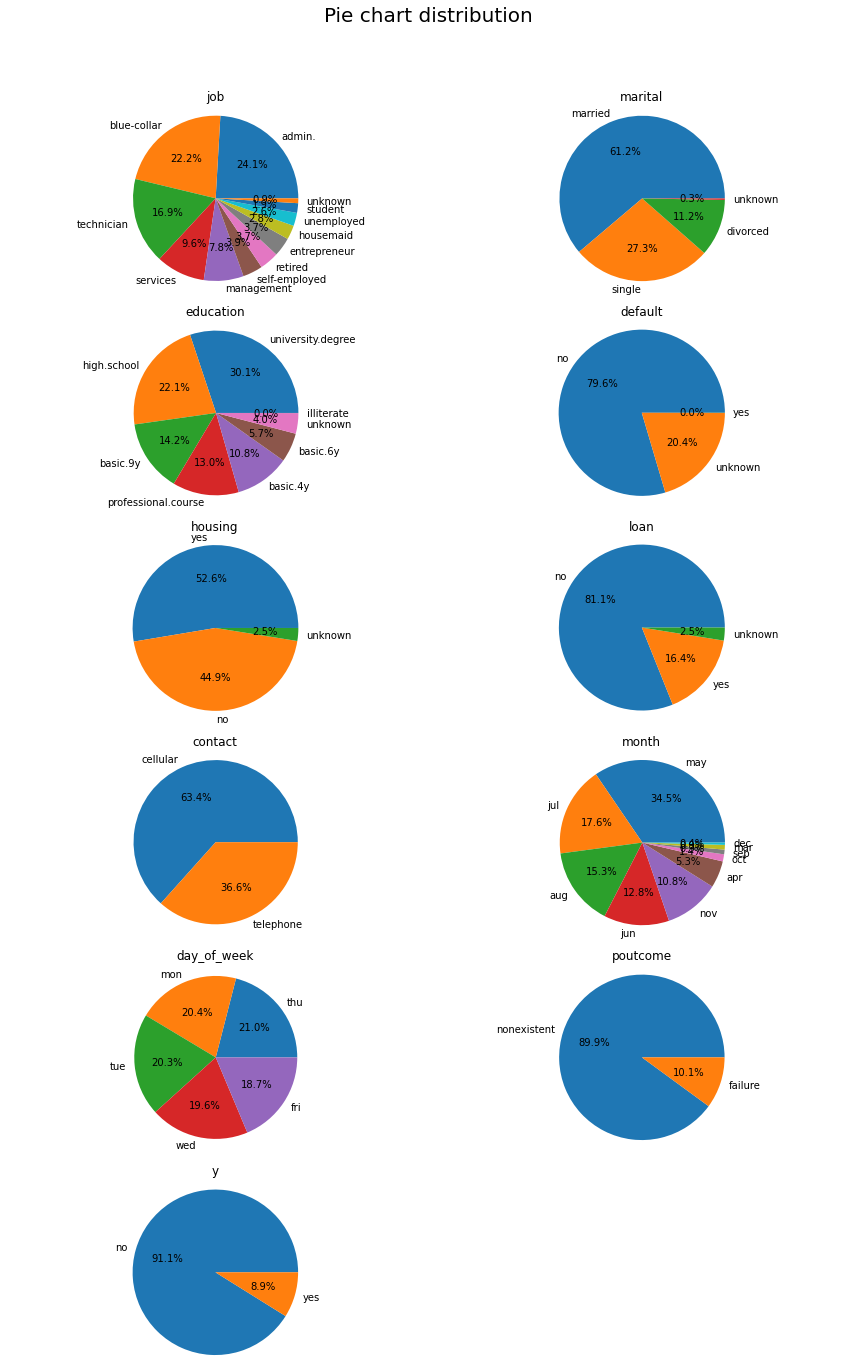

In [ ]:
fig = plt.figure(figsize=(12,20))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset.shape[1]+1):
    plt.subplot(6,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset.columns.values[i-1])
    
    values = dataset.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])

## Transformation of Categorical Variables

In [ ]:
bank_a_df['y'].replace(['no', 'yes'], [0, 1], inplace=True)

In [ ]:
#identify all categorical variables
cat_columns = bank_a_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
bank_a_df[cat_columns] = bank_a_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

## Important Features

In [ ]:
target = bank_a_df['y']
features = bank_a_df.drop('y', axis=1)

# train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                      random_state=10, shuffle=True, stratify=None)

# train random forest regressor
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)

# Perform feature selection with feature names
selector = SelectFromModel(rf, threshold='mean', prefit=True, max_features=18, importance_getter=lambda x: x.feature_importances_)
X_train_new = selector.transform(X_train.values)
X_test_new = selector.transform(X_test.values)

# Get selected feature names
selected_feature_names = [features.columns[i] for i in selector.get_support(indices=True)]

# Print selected feature names and indices
print('Selected feature names:', selected_feature_names)
print('Selected feature indices:', selector.get_support(indices=True))

Selected feature names: ['euribor3m', 'nr.employed', 'log_age', 'log_duration']
Selected feature indices: [16 17 18 19]


In [ ]:
# Feature Selection with Recursive feature elimination (RFE)

lr = LogisticRegression(max_iter=10000)

# Perform RFE to select the top 10 features
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# Print the feature ranking
print("Feature ranking:", rfe.ranking_)

# Get selected feature names
selected_feature_names = [features.columns[i] for i in selector.get_support(indices=True)]

# Print the indices of the selected features
print('Selected feature names:', selected_feature_names)
print("Selected features indeces:", rfe.get_support(indices=True))

Feature ranking: [12  6 11  9 13  5  1  4 10  8  3  2  1  1  1  7 15 16 14  1]
Selected feature names: ['euribor3m', 'nr.employed', 'log_age', 'log_duration']
Selected features indeces: [ 6 12 13 14 19]


In [ ]:
feature_ranking = [12, 6, 11, 9, 13, 5, 1, 4, 10, 8, 3, 2, 1, 1, 1, 7, 15, 16, 14, 1]
len(feature_ranking)

20

In [ ]:
X_train.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'log_age', 'log_duration'],
      dtype='object')

In [ ]:

column_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'log_age', 'log_duration']
len(column_names)

20

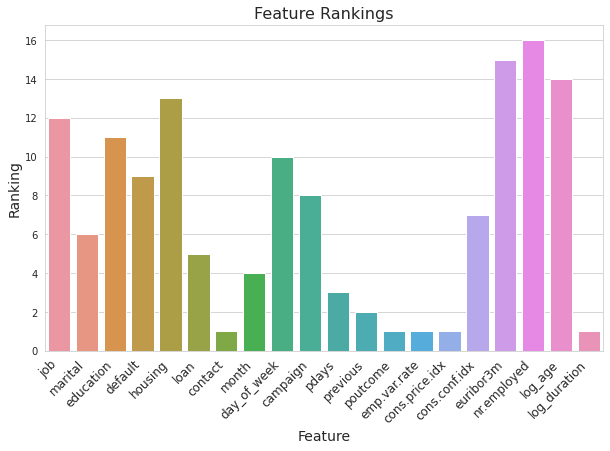

In [ ]:
# create a pandas dataframe
df = pd.DataFrame({'feature_ranking': feature_ranking, 'column_names': column_names})
# plot a bar graph using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="column_names", y="feature_ranking", data=df)
ax.set_xticklabels(column_names, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Feature', fontsize=14)
ax.set_ylabel('Ranking', fontsize=14)
ax.set_title('Feature Rankings', fontsize=16)
plt.show()

In [ ]:
remove_col = variance_threshold_selector(X_train, thresh=0.05)
remove_col

['pdays']

In [ ]:
bank_a_df.drop(columns=['contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx'], inplace=True, axis=1)

In [ ]:
bank_a_df.sample(5)

,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.conf.idx,euribor3m,nr.employed,y,log_age,log_duration
1673,2,1,2,0,0,2,3,3,2,-29.8,0.819,5017.5,0,3.465736,4.234107
3206,0,0,5,1,1,2,1,3,2,-41.8,4.864,5228.1,0,3.526361,5.620401
2047,2,1,2,0,1,0,0,4,1,-46.2,1.327,5099.1,0,3.401197,5.293305
532,9,2,0,0,0,0,8,1,2,-49.5,0.959,4963.6,0,4.158883,6.403574
721,6,2,2,0,0,0,0,2,1,-46.2,1.244,5099.1,0,3.610918,5.170484


In [ ]:
bank_a_df['y'].value_counts()

0    3480
1     339
Name: y, dtype: int64

# Save the clean data frame

In [ ]:
bank_a_df.to_csv('bank-additional-clean.csv', sep=";", index=False)

<hr/>

<hr/>

# Second Data Frame

In [ ]:
# Second Dataframe is baf_df
baf_df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [ ]:
baf_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
baf_df.shape

(41188, 21)

In [ ]:
print(f'Any NaN values? {baf_df.isna().values.any()}')
print(f'Any duplicates? {baf_df.duplicated().values.any()}')

Any NaN values? False
Any duplicates? True


In [ ]:
print( f"Nr. of duplicated rows: {baf_df.duplicated().sum()}")

Nr. of duplicated rows: 12


In [ ]:
baf_df = baf_df.drop_duplicates()
print(f'Any duplicates? {baf_df.duplicated().values.any()}')

Any duplicates? False


There are no Nan values or duplicate rows in bank full dataframe. Let's check for outliers.

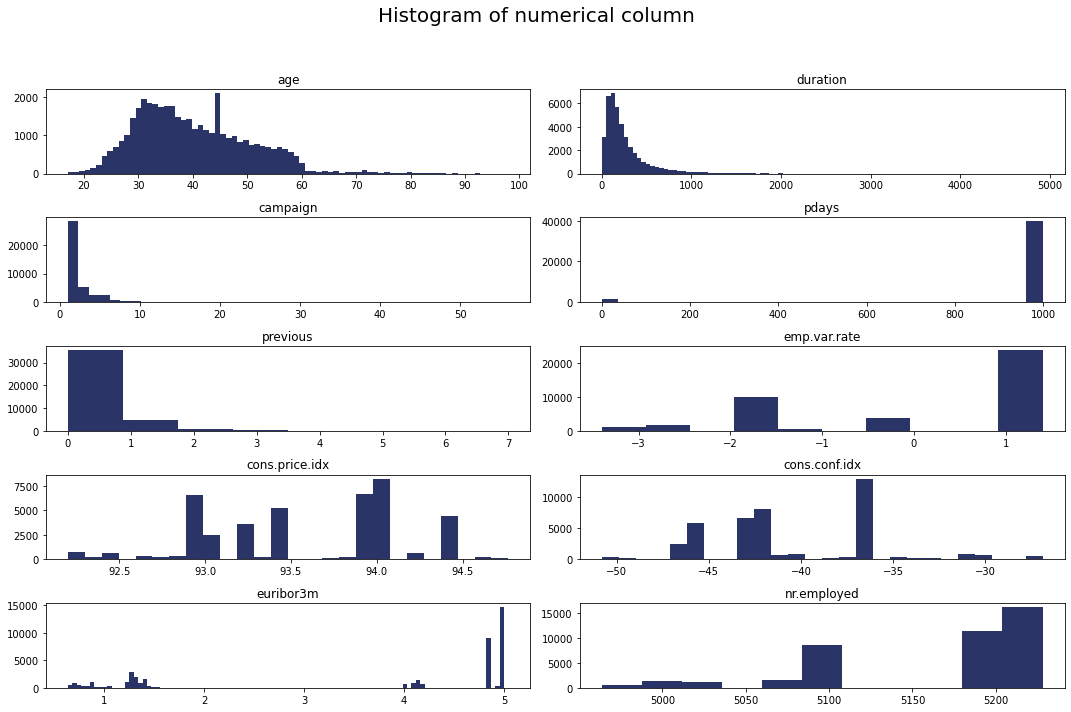

In [ ]:
dataset1 = baf_df.drop(columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact','month','day_of_week','poutcome','y'])

fig = plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical column", fontsize=20)

for i in range(dataset1.shape[1]):
    plt.subplot(6,2,i+1)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i])
    
    vals = np.size(dataset1.iloc[:,i].unique())
    if vals>=100:
        vals=100
    
    plt.hist(dataset1.iloc[:,i], bins= vals, color="#2B3467")
    
plt.tight_layout(rect=[0,0.03,1,0.95])

Let's check lower outliers

In [ ]:
for col_name in numerical_cols:
  print(col_name)
  outliers = find_lower_outliers(baf_df, col_name)

age
How many outliers are there: 0
[]
duration
How many outliers are there: 0
[]
campaign
How many outliers are there: 0
[]
pdays
How many outliers are there: 1515
[19, 20, 21, 21, 22, 22, 22, 25, 26, 27]
previous
How many outliers are there: 0
[]
emp.var.rate
How many outliers are there: 0
[]
cons.price.idx
How many outliers are there: 0
[]
cons.conf.idx
How many outliers are there: 0
[]
euribor3m
How many outliers are there: 0
[]
nr.employed
How many outliers are there: 0
[]


Only the PDAYS column has lower outliers. Let's check upper outliers

In [ ]:
for col_name in numerical_cols:
  print(col_name)
  outliers = find_upper_outliers(baf_df, col_name)

age
How many outliers are there: 369
[72, 72, 72, 72, 72, 72, 72, 72, 72, 72]
duration
How many outliers are there: 861
[1037, 1037, 1037, 1038, 1038, 1038, 1038, 1039, 1040, 1041]
campaign
How many outliers are there: 869
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
pdays
How many outliers are there: 0
[]
previous
How many outliers are there: 1064
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
emp.var.rate
How many outliers are there: 0
[]
cons.price.idx
How many outliers are there: 0
[]
cons.conf.idx
How many outliers are there: 0
[]
euribor3m
How many outliers are there: 0
[]
nr.employed
How many outliers are there: 0
[]


Age, duration, campaign and previous columns have upper outliers.

In [ ]:
temp2_df = baf_df[baf_df['pdays'] < 999]
temp2_df.shape

(1515, 21)

In [ ]:
find_lower_outliers(temp2_df, 'pdays')

How many outliers are there: 0
[]


[]

## Handling Outliers

In [ ]:
 
# campaign: drop outliers
# previous: drop outliers
# for age and duration columns apply logorithmic transformation

In [ ]:
# dropping outliers from pdays column
#baf_df = baf_df[baf_df['pdays'] > 27]
#baf_df.shape

(39661, 21)

In [ ]:
# dropping outliers from campaign column
baf_df = baf_df[baf_df['campaign'] < 11]
baf_df.shape

(38794, 21)

In [ ]:
# dropping outliers from previous column
baf_df = baf_df[baf_df['previous'] < 2]
baf_df.shape

(38380, 21)

In [ ]:
baf_df = baf_df[baf_df['duration'] > 0]
baf_df.shape

(38376, 21)

In [ ]:
baf_df_copy = baf_df.copy()
baf_df['log_age'] = np.log(baf_df['age'])
baf_df['log_duration'] = np.log(baf_df['duration']) 

In [ ]:
baf_df.drop(columns=['age', 'duration'], inplace=True, axis=1)

## Feature Selection and Transformation of Categorical Variables

In [ ]:
baf_df['y'].replace(['no', 'yes'], [0, 1], inplace=True)

In [ ]:
#identify all categorical variables
cat_columns = baf_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
baf_df[cat_columns] = baf_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
baf_df.drop(columns=['contact', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx'], inplace=True, axis=1)

In [ ]:
baf_df.sample(5)

,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.conf.idx,euribor3m,nr.employed,y,log_age,log_duration
26781,1,0,3,0,1,1,5,3,1,-42.0,4.076,5195.8,0,3.367296,4.955827
17744,1,2,4,0,1,0,2,1,1,-42.7,4.961,5228.1,0,3.850148,5.105945
3559,6,0,6,1,0,0,0,4,1,-36.4,4.859,5191.0,0,3.912023,4.912655
31645,3,0,6,1,1,0,0,3,1,-46.2,1.327,5099.1,0,3.737670,6.135565
18203,2,0,1,0,0,0,2,2,3,-42.7,4.963,5228.1,0,3.784190,4.605170


In [ ]:
baf_df['y'].value_counts()

0    34812
1     3564
Name: y, dtype: int64

# Save the Clean Data Frame

In [ ]:
baf_df.to_csv('bank-additional-full-clean.csv', sep=";", index=False)

In [ ]:
baf_df.shape

(38376, 15)

In [ ]:
bank_a_df.shape

(3819, 15)